In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
def accuracy(x,y):
    acc = 0
    for i in range(len(x)):
        if x[i,]==y[i,]:
            acc+=1
        else:
            acc+=0
    rate = acc/len(x)
    print('Accuracy rate is: ',rate)
    
    
def plot(image,ans):
    if len(image) > 10 | len(ans) > 10:
        print('TOO MANY PHOTOS IN ONE TIME!!')
        print('The maximum is 10 photos')
    for i in range(len(image)):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i,...])
        plt.title(ans[i])

In [2]:
# 單一程度
path=os.getcwd()+'\\DATA\\picture01'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)

Images are all in read_images
(40000, 100, 100)


In [3]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


In [4]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):

    
   
    input_tensor = Input(shape=(100, 100, 1))
    model_inv3_60 = Sequential()
    model_inv3_60.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
    model_inv3_60.add(Flatten())
    model_inv3_60.add(Dense(8,activation = 'softmax'))    
    
 

    model_inv3_60.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


    history = model_inv3_60.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, verbose=0, batch_size=n_batch, shuffle = True)
    # plot learning curves 
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_accur'], label='test')
    pyplot.title('batch='+str(n_batch), pad=-40)
 

In [5]:
from matplotlib import pyplot

In [ ]:
###### 先在現在的位置新增一個名字叫 "inceptionv3"的資料夾

In [7]:
####    在"inceptionv3"的資料夾 新增一個名字叫 "checkpoint50_record"的資料夾 , 30 是epoch次數(自行修改)

In [ ]:
#### 在"inceptionv3"的資料夾  新增一個名字叫 "train_history_50"的資料夾

In [ ]:
####  在"inceptionv3"的資料夾  新增一個名字叫 "image_save"的資料夾

# epoch 50 第1次

In [7]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_50_1 = Sequential()
model_inv3_50_1.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_50_1.add(Flatten())
model_inv3_50_1.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\checkpoint50_record\\model_iter50_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_50_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_50_1 = model_inv3_50_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture\train_history_50\train_history_50_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_50_1.history, outhis)  
                             #改

Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.40085, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 47s - loss: 1.4842 - acc: 0.4008 - val_loss: 1.9035 - val_acc: 0.2979
Epoch 2/50

Epoch 00002: acc improved from 0.40085 to 0.48375, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 36s - loss: 1.2299 - acc: 0.4837 - val_loss: 1.2850 - val_acc: 0.4592
Epoch 3/50

Epoch 00003: acc improved from 0.48375 to 0.49754, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 36s - loss: 1.1687 - acc: 0.4975 - val_loss: 221.6944 - val_acc: 0.2007
Epoch 4/50

Epoch 00004: acc improved from 0.49754 to 0.50080, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 36s - loss

22400/22400 - 36s - loss: 0.3374 - acc: 0.8537 - val_loss: 0.8794 - val_acc: 0.6917
Epoch 38/50

Epoch 00038: acc improved from 0.85371 to 0.87286, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 36s - loss: 0.3027 - acc: 0.8729 - val_loss: 1.0569 - val_acc: 0.6814
Epoch 39/50

Epoch 00039: acc improved from 0.87286 to 0.89344, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 36s - loss: 0.2550 - acc: 0.8934 - val_loss: 0.7545 - val_acc: 0.7315
Epoch 40/50

Epoch 00040: acc improved from 0.89344 to 0.90920, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_1.hdf5
22400/22400 - 36s - loss: 0.2270 - acc: 0.9092 - val_loss: 1.0186 - val_acc: 0.6888
Epoch 41/50

Epoch 00041: acc improved from 0.90920 to 0.92353, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\mode

NameError: name 'train_history_50_1' is not defined

# picture-50 第2次

In [5]:


tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料z                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_50_2 = Sequential()
model_inv3_50_2.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_50_2.add(Flatten())
model_inv3_50_2.add(Dense(8,activation = 'softmax'))


filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\checkpoint50_record\\model_iter50_2.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_50_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_50_2 = model_inv3_50_2.fit(x=x_train, y=y_train, validation_split=0.3, epochs=50, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture\train_history_50\train_history_50_2.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_50_2.history, outhis)  
                              #改

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 22400 samples, validate on 9600 samples
Epoch 1/50

Epoch 00001: acc improved from -inf to 0.37576, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 46s - loss: 1.5291 - acc: 0.3758 - val_loss: 2.8555 - val_acc: 0.1993
Epoch 2/50

Epoch 00002: acc improved from 0.37576 to 0.47500, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 36s - loss: 1.2465 - acc: 0.4750 - val_loss: 2.6469 - val_acc: 0.4023
Epoch 3/50

Epoch 00003: acc improved from 0.47500 to 0.48714, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 36s - loss: 1.2156 - acc: 0.4871 - val_loss: 2.1976 - val_acc: 0.4640
Epoch 4/50

Epoch 00004: acc improved from 0.48714 to 0.49670, saving model t

22400/22400 - 36s - loss: 0.3918 - acc: 0.8135 - val_loss: 0.7282 - val_acc: 0.7028
Epoch 36/50

Epoch 00036: acc improved from 0.81353 to 0.81924, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 35s - loss: 0.3846 - acc: 0.8192 - val_loss: 0.9197 - val_acc: 0.7102
Epoch 37/50

Epoch 00037: acc improved from 0.81924 to 0.83978, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 35s - loss: 0.3538 - acc: 0.8398 - val_loss: 0.6318 - val_acc: 0.7359
Epoch 38/50

Epoch 00038: acc improved from 0.83978 to 0.84768, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\model_iter50_2.hdf5
22400/22400 - 35s - loss: 0.3359 - acc: 0.8477 - val_loss: 0.7667 - val_acc: 0.7010
Epoch 39/50

Epoch 00039: acc improved from 0.84768 to 0.86442, saving model to C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\mode

In [12]:
dirpath=r'C:\Users\user\Desktop\project\inceptionv3_picture\train_history_50\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename

['C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_1.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_10.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_2.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_3.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_4.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_5.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_6.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_7.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_50_8.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture\\train_history_50\\train_history_

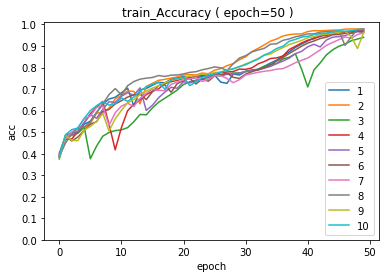

In [13]:
# train acc

for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['acc'],label=i+1)
        
    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('train_Accuracy ( epoch=50 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
plt.savefig(r'C:\Users\user\Desktop\project\inceptionv3_picture\image_save\train_acc_50.jpg')    #匯出到資料夾 
plt.show()

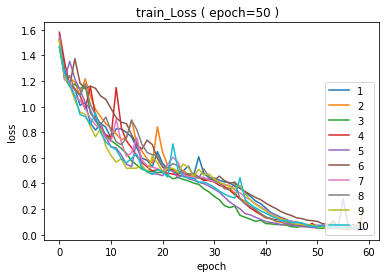

In [10]:
# train loss



for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['loss'],label=i+1)
        
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('train_Loss ( epoch=50 )  ') #epoch要改
    plt.legend(loc=4)
   
    
plt.savefig(r'C:\Users\user\Desktop\project\inceptionv3_picture\image_save\train_loss_50.jpg')     
plt.show()

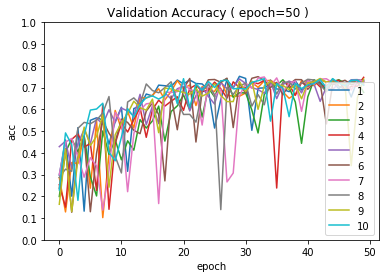

In [15]:
# val acc


for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_acc'],label=i+1)

    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('Validation Accuracy ( epoch=50 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
plt.savefig(r'C:\Users\user\Desktop\project\inceptionv3_picture\image_save\val_acc_50.jpg') 
plt.show()

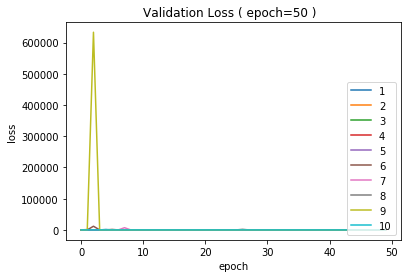

In [16]:
# val loss

for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_loss'],label=i+1)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Validation Loss ( epoch=50 )  ') #epoch要改
    plt.legend(loc=4)
   
    
plt.savefig(r'C:\Users\user\Desktop\project\inceptionv3_picture\image_save\val_loss_50.jpg') 
plt.show()

In [17]:
# 紀錄10次train/val的 acc/loss 最高/低 平均
#這裡都不用改喔

train_acc_max_10=[]
train_loss_min_10=[]
val_acc_max_10=[]
val_loss_min_10=[]

for i in range(0,2):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
        train_acc_max_10.append(max(a['acc']))
        train_loss_min_10.append(min(a['loss'])) 
        val_acc_max_10.append(max(a['val_acc']))
        val_loss_min_10.append(min(a['val_loss']))                                         
        
        

print("10次train_acc最高的平均={}".format(round(sum(train_acc_max_10)/len(train_acc_max_10),3)))    
print("10次train_loss最低的平均={}".format(round(sum(train_loss_min_10)/len(train_loss_min_10),3)))
print("10次val_acc最高的平均={}".format(round(sum(val_acc_max_10)/len(val_acc_max_10),3)))    
print("10次val_loss最低的平均={}".format(round(sum(val_loss_min_10)/len(val_loss_min_10),3)))



#之後在給

10次train_acc最高的平均=0.978
10次train_loss最低的平均=0.063
10次val_acc最高的平均=0.744
10次val_loss最低的平均=0.511


# test1(單一程度的修圖_picture01) Accuracy¶

In [ ]:
# 自動增長 GPU 記憶體用量
#gpu_options = tf.GPUOptions(allow_growth=True)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# 10 次 test的 acc和 loss的平均(記錄到雲端表格中)
#這裡只要改路徑，其他的不用改

dirpath1=r'C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\*.*' #checkpoint30_record資料夾
filename2=glob.glob(dirpath1)


test_acc=[]
test_loss=[]

for i in range(0,10):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
    test_acc.append(a[1])
    test_loss.append(a[0])

print("10次test_loss平均={}".format(round(sum(test_loss)/len(test_loss),3)))
print("10次test_acc平均={}".format(round(sum(test_acc)/len(test_acc),3) ))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# test2(不同程度的修圖_picture02) Accuracy¶

In [ ]:
path='C:\\Users\\user\\Desktop\\project\\picture02'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)     

In [ ]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train).toarray()


y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

In [4]:
dirpath1=r'C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint50_record\*.*' 
filename2=glob.glob(dirpath1)


test_acc=[]
test_loss=[]

for i in range(0,10):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
    test_acc.append(a[1])
    test_loss.append(a[0])

print("10次test_loss平均={}".format(round(sum(test_loss)/len(test_loss),3)))
print("10次test_acc平均={}".format(round(sum(test_acc)/len(test_acc),3) ))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
8000/8000 [==============================] - 6s 705us/sample - loss: 3.2377 - acc: 0.4826
10次test_loss平均=3.854
10次test_acc平均=0.451
